In [2]:
import random
import numpy as np
from tqdm import tqdm
from pandas import DataFrame
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('punkt')

# text_data = '''Steve Jobs was a visionary entrepreneur who co-founded and served as the CEO of Apple Inc., one of the world's largest technology companies. He was born on February 24, 1955, in San Francisco, California, and passed away on October 5, 2011. Jobs was widely recognized for his innovative approach to technology, design, and marketing, which revolutionized the computer and mobile phone industries.
# Jobs co-founded Apple Computer in 1976 with Steve Wozniak, and the company quickly gained popularity with the release of its first computer, the Apple I. Jobs had a passion for design and user experience, and he worked tirelessly to ensure that Apple products were not only functional, but also visually appealing. Under his leadership, Apple released several groundbreaking products, including the Macintosh computer, the iMac, and the iPod, which changed the way people interact with technology.
# In addition to his work at Apple, Jobs was also a pioneer in the computer graphics industry. He co-founded and served as the CEO of Pixar Animation Studios, which produced several critically acclaimed animated films, including "Toy Story," "Finding Nemo," and "The Incredibles." Jobs' approach to storytelling and animation revolutionized the industry and set a new standard for animation and filmmaking.
# Despite his success, Jobs faced several challenges throughout his career. In 1985, he was forced to resign from Apple due to disagreements with the board of directors. During this time, he founded NeXT Computer, a company that developed cutting-edge computer software. In 1996, Apple acquired NeXT, and Jobs returned to the company as CEO. He later presided over a period of significant growth and innovation at Apple, including the development of the iPhone and iPad.
# Jobs' impact on the technology industry cannot be overstated. He was a visionary who saw the potential of technology to change the world, and he worked tirelessly to turn his vision into reality. He was a master of design and user experience, and his products changed the way people interact with technology. Jobs was also a great leader who inspired others to pursue their dreams and to think differently about the world.
# In conclusion, Steve Jobs was a visionary entrepreneur who left a lasting impact on the technology and animation industries. His innovative approach to design, technology, and marketing revolutionized the way people interact with technology, and his legacy continues to inspire entrepreneurs and innovators today. Jobs will always be remembered as a brilliant entrepreneur and a master of design, who pushed the boundaries of what was possible and made a lasting impact on the world'''

text_data = ''
fd = open('big.txt' ,'r')
text_data = fd.read()
fd.close()
text_data = text_data[:100000]

text_data = text_data.lower()

for i in '!@#$~%^&*()_+-=[]{}\|;:",/<>?"\n':
    text_data = text_data.replace(i,' ')
text_data = text_data.replace("'","")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
text_data = text_data.replace('  ',' ')

# words = text_data.split(' ')                                    # Finding Unique Words

words = word_tokenize(text_data)

words = [word for word in words if len(word) != 0]              # Removing Null
word_index = {word: i for i, word in enumerate(set(words))}     # Creating Word Index Dictionary
index_word = {word_index[word]:word for word in word_index}     # Creating Index Word Dictionary

sents = [word_tokenize(sent) for sent in sent_tokenize(text_data)]

In [4]:
window_size = 2

features    = []
labels      = []

for sent in sents:
    for i in range(len(sent) - (window_size*2)):
        features.append(sent[i : i + window_size] + sent[i + window_size + 1 : i + window_size*2 + 1])
        labels.append(sent[ i + window_size ])

X_train = []
for feature in features:
    enc = np.zeros(len(word_index))
    for word in feature:
        enc[word_index[word]] = 1

    X_train.append(enc)

X_train = np.array(X_train)

y_train = []

for label in labels:
    enc = np.zeros(len(word_index))
    enc[word_index[label]] = 1
    y_train.append(enc)
y_train = np.array(y_train)


In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(100, input_dim=len(word_index), activation='relu'))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

predictions = model.predict(X_train)


Epoch 1/10
479/479 [==============================] - 4s 7ms/step - loss: 6.6617 - accuracy: 0.0556
Epoch 2/10
479/479 [==============================] - 3s 7ms/step - loss: 5.9642 - accuracy: 0.0741
Epoch 3/10
479/479 [==============================] - 4s 8ms/step - loss: 5.6937 - accuracy: 0.0998
Epoch 4/10
479/479 [==============================] - 3s 7ms/step - loss: 5.4335 - accuracy: 0.1208
Epoch 5/10
479/479 [==============================] - 3s 7ms/step - loss: 5.1545 - accuracy: 0.1503
Epoch 6/10
479/479 [==============================] - 3s 7ms/step - loss: 4.8439 - accuracy: 0.1890
Epoch 7/10
479/479 [==============================] - 4s 8ms/step - loss: 4.4981 - accuracy: 0.2300
Epoch 8/10
479/479 [==============================] - 3s 7ms/step - loss: 4.1206 - accuracy: 0.2696
Epoch 9/10
479/479 [==============================] - 3s 7ms/step - loss: 3.7124 - accuracy: 0.3208
Epoch 10/10
479/479 [==============================] - 1s 2ms/step


In [6]:
word_embeddings = model.get_weights()[0]

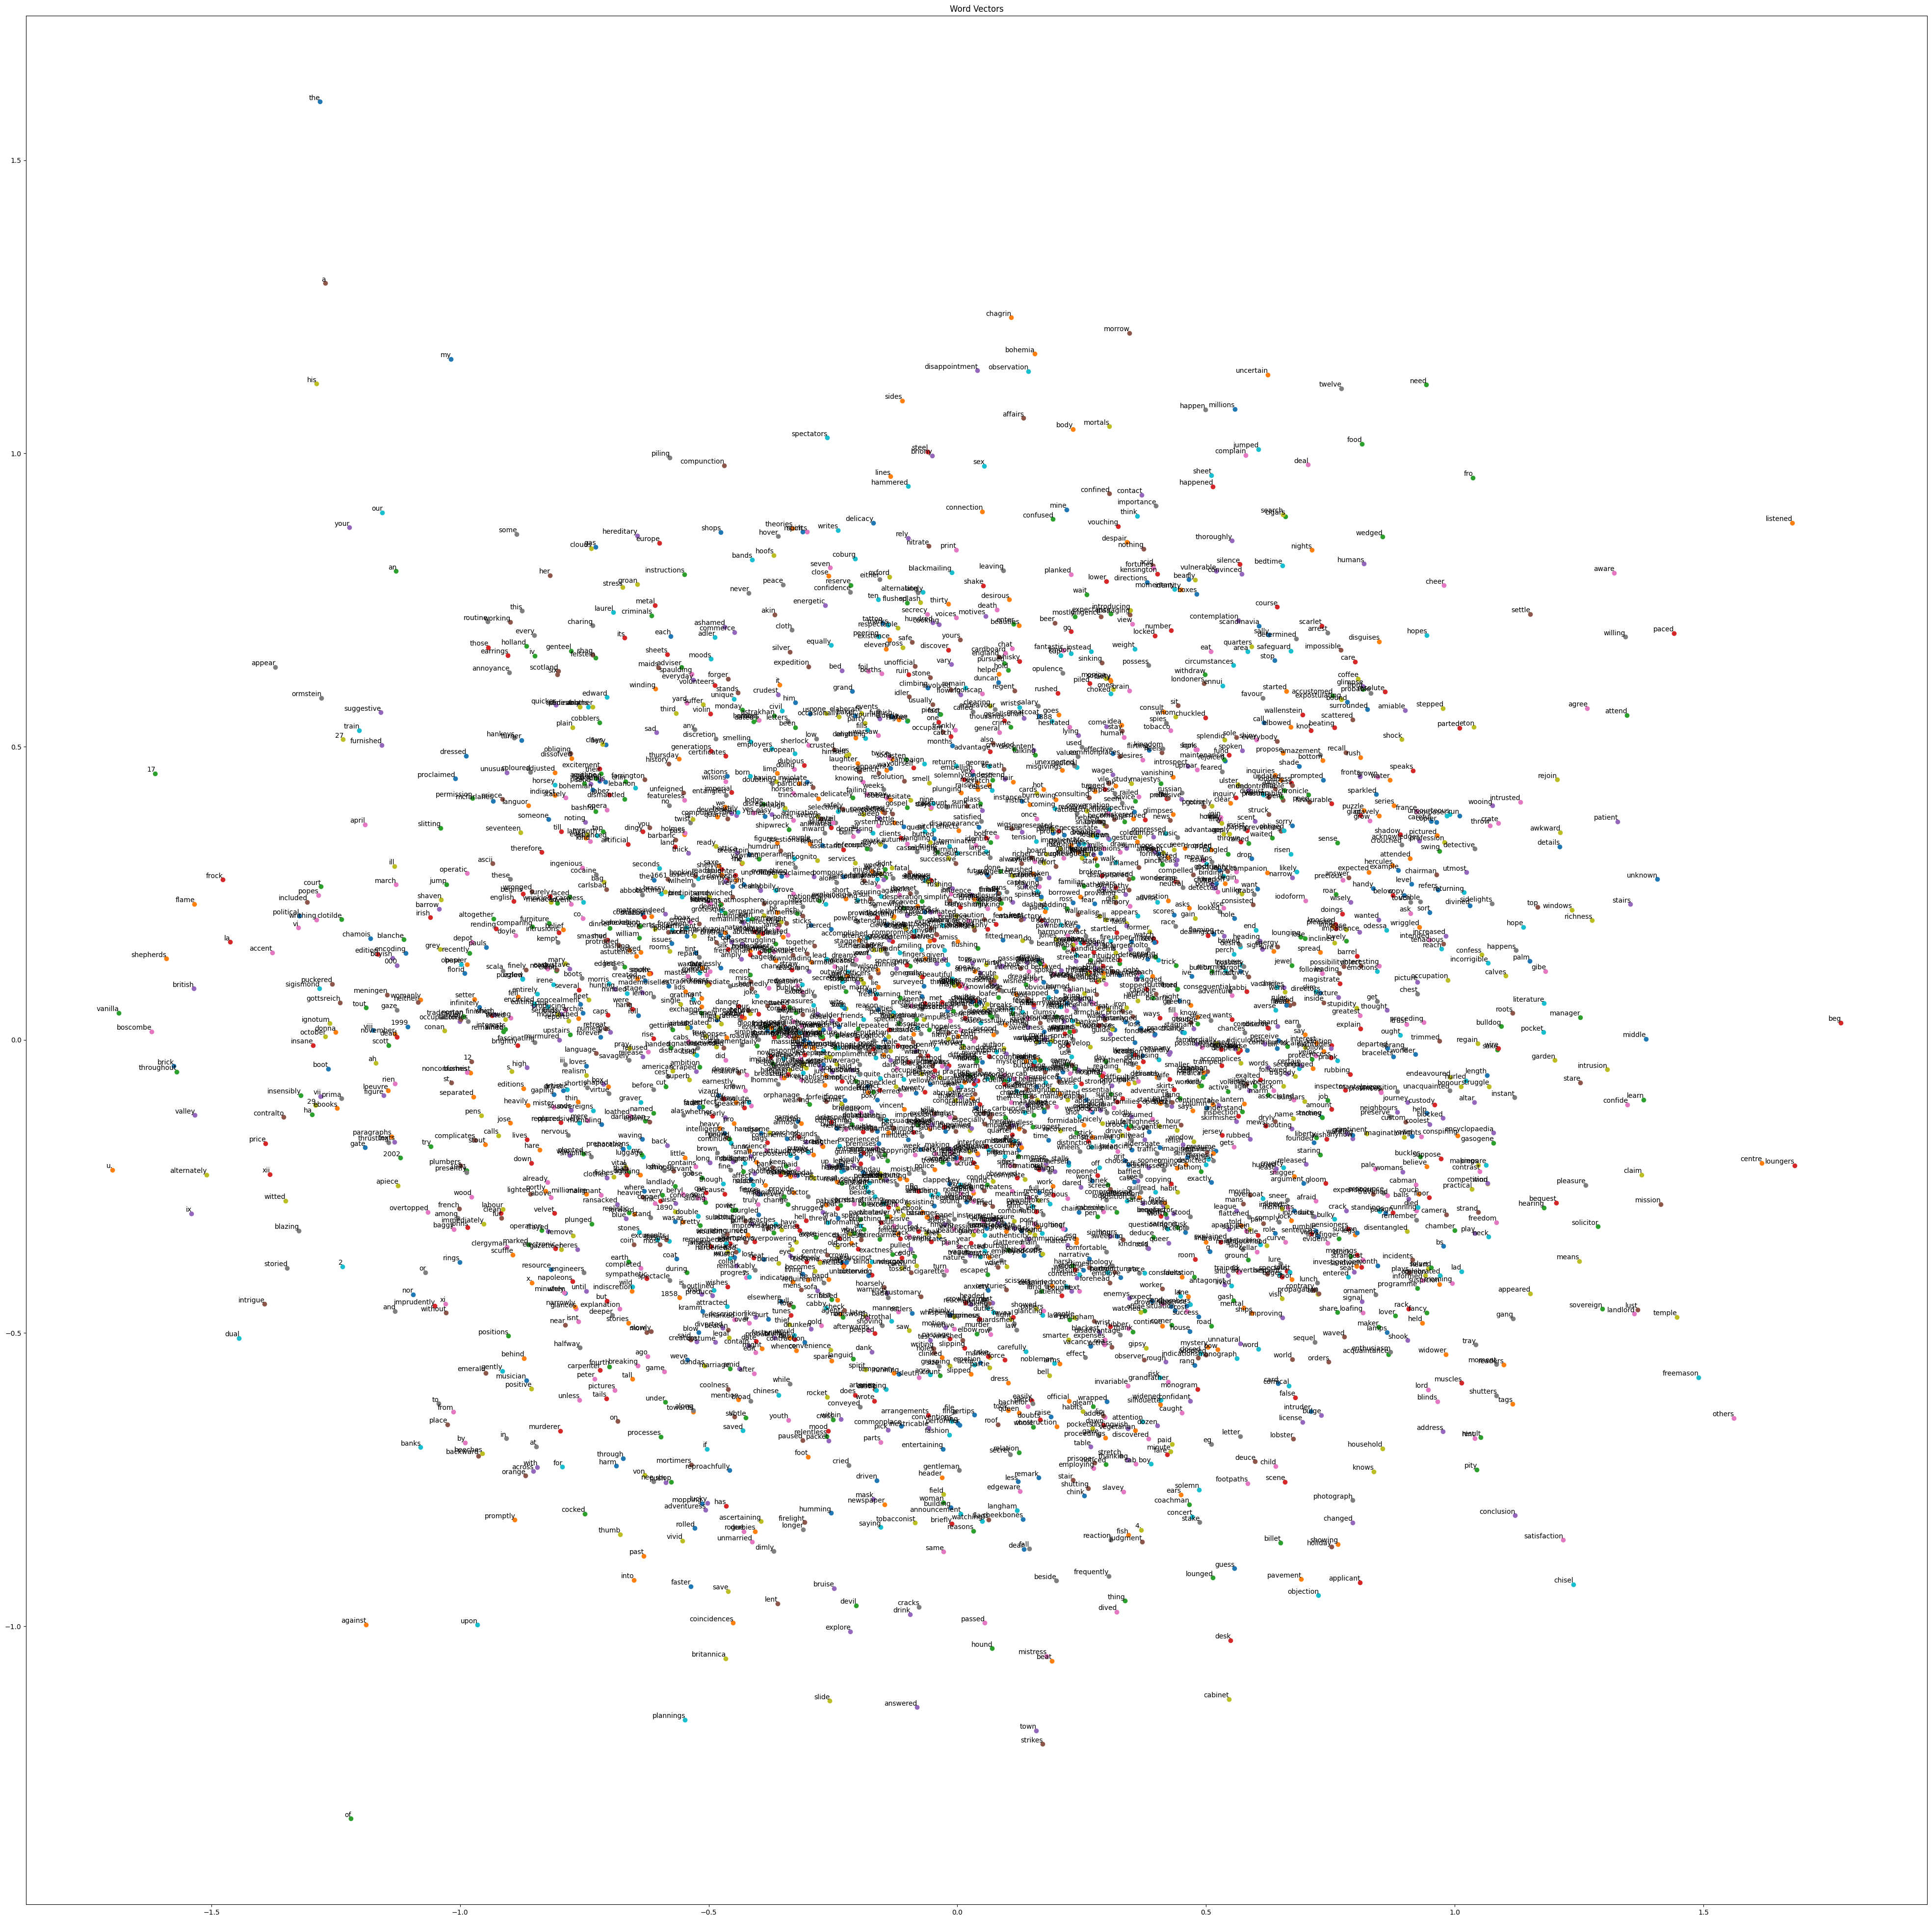

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample words for visualization
sample_words = word_index.keys()

# Get embeddings for sample words
sample_embeddings = []
for word in sample_words:
    word_index_ = word_index[word]
    embedding = word_embeddings[word_index_]
    sample_embeddings.append(embedding)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sample_embeddings)

# Plot the word vectors
plt.figure(figsize=(50, 50))
for i, word in enumerate(sample_words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(.5, .5), textcoords='offset points', ha='right', va='bottom')
plt.title('Word Vectors')
plt.show()

In [8]:
target_word = word_embeddings[word_index['this']]
distances = np.dot(word_embeddings, target_word)
most_similar_indices = np.argsort(distances)[::-1][:10]
most_similar_words = [index_word[i] for i in most_similar_indices]
print("Most similar words to target word:", most_similar_words)

Most similar words to target word: ['this', 'the', 'his', 'a', 'my', 'frock', 'hover', '27', 'ormstein', 'someone']
